In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from pathlib import Path
import os
from collections import defaultdict
tb_path = "/home/noah/ESSL/final_exps/optimization/exp8_0/1/tensorboard/scalars.csv"
paths = glob.glob("/home/noah/ESSL/final_exps/optimization/exp*/*/tensorboard/scalars.csv")

In [2]:
def get_algorithm(params_path):
    with open(params_path, "r") as f:
        params = []
        for i, l in enumerate(f.readlines()):
            params.append(l)
    # get params
    ssl = [j.split(" ")[1].strip("\n") for j in params if "ssl_task" in j][0]
    bs = [j.split(" ")[1].strip("\n") for j in params if "ssl_batch_size" in j][0]
    ds = [j.split(" ")[1].strip("\n") for j in params if "dataset" in j][0]
    return ssl, bs, ds
    
color_dict = {
            "SimSiam":"r",
             "BYOL":"b",
             "SwaV":"g",
             "NNCLR":"orange",
             }

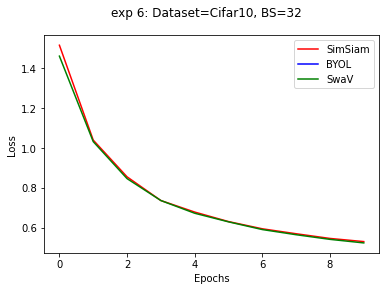

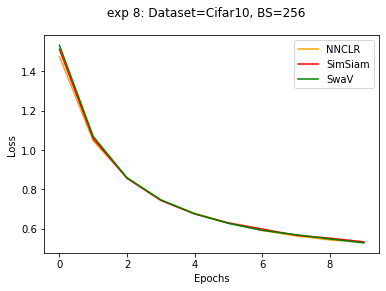

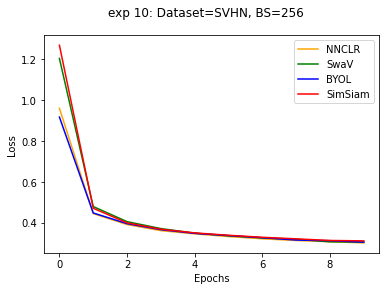

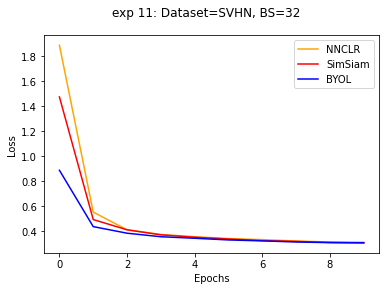

<Figure size 432x288 with 0 Axes>

In [3]:
exps = defaultdict(list)
for exp in paths:
#     df = pd.read_csv(exp)
#     #df = df[df["tag"].isin(["worst_downstream_loss__gen_9", "best_downstream_loss__gen_9"])]
#     exp_dir = str(Path(exp).parents[1])
    exp_name = str(Path(exp).parents[2]).split("/")[-1]
    exps[exp_name.split("_")[0].strip("exp")].append(exp)
for e in exps:
    for exp in exps[e]:
        df = pd.read_csv(exp)
        exp_dir = str(Path(exp).parents[1])
        algo, bs, ds = get_algorithm(os.path.join(exp_dir, "params.txt"))
        best = df[df["tag"] == "best_downstream_loss__gen_9"]
        # worst = df[df["tag"] == "worst_downstream_loss__gen_9"]
        plt.plot(list(range(len(best["value"]))), best["value"],c=color_dict[algo], label=algo)
        # plt.plot(list(range(len(best["value"]))), worst["value"], c="b", label="loss (worst)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.suptitle(f"exp {e}: Dataset={ds}, BS={bs}")
    plt.legend()
    plt.show()
    plt.clf()